1. Using Scikit.learn, load the MNIST digits (See here: http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html#sklearn.datasets.load_digits).

2. Plot some of the examples.

3. Choose two digit classes (e.g 7s and 3s) , and train a k-nearest neighbor classifier.

4. Report your error rates on a held out part of the data.

5. (Optional) Test your model on the full dataset (available from http://yann.lecun.com/exdb/mnist/)

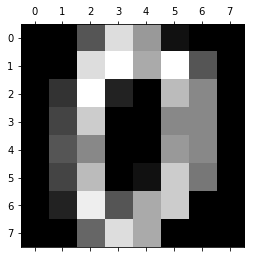

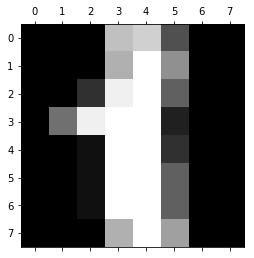

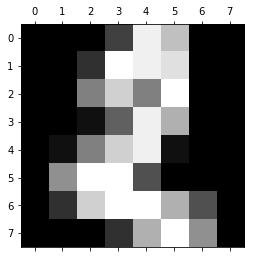

In [2]:
%matplotlib inline

from sklearn.datasets import load_digits
import matplotlib.pyplot as plt  
import numpy as np
from __future__ import print_function
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from skimage import exposure
import pandas as pd

digits = load_digits()

plt.gray()
for i in range(3):
    plt.matshow(digits.images[i]) 
plt.show()

In [13]:
mnist = load_digits(2) # Load digit classes of 0 and 1

X = np.array(mnist.data)
Y = mnist.target

def KNN(X,Y,initial_k,k_increment):
    # k-nearest neighbor where X and Y = Training data and labels. 
    # Initial_k = Starting k-value, k-increment = increment in k during test
    
    # Splitting data into training and testing sets
    (trainData, testData, trainLabels, testLabels) = train_test_split(X, Y, test_size=0.25, random_state=42)
    
    # Further splitting training set into validation set to find optimal value of k
    
    (trainData, valData, trainLabels, valLabels) = train_test_split(trainData, trainLabels, 
                                                                    test_size=0.25, random_state=84)

    # Declare array to store all possible k-values and accuracy values of each k-value
    kVals = range(initial_k, len(valData)+1, k_increment)
    accuracies = []

    print("Testing the best value of k on validation dataset of size %d" % len(valLabels))
    
    # Runs KNN for all values of k within range and select k with the highest accuracy
    for k in kVals:
        model = KNeighborsClassifier(n_neighbors=k)
        model.fit(trainData, trainLabels)

        score = model.score(valData, valLabels)
        accuracies.append(score)

    index = np.argmax(accuracies)
    
    print("The best value of k is %d with accuracy score of %.2f" % (kVals[index], accuracies[index] * 100))
    
    # Run KNN with the best value of k and predict the test data
    model = KNeighborsClassifier(n_neighbors=kVals[index])
    model.fit(trainData, trainLabels)
    predictions = model.predict(testData)

    # Report the accuracy for predicted values of test 
    print ("")
    print("Evaluation Report")
    print(classification_report(testLabels, predictions))
    
KNN(X,Y,1,1)

# Model accuracy improved with codes adopted from https://gurus.pyimagesearch.com/lesson-sample-k-nearest-neighbor-classification/

Testing the best value of k on validation dataset of size 68
The best value of k is 1 with accuracy score of 100.00

Evaluation Report
             precision    recall  f1-score   support

          0       1.00      1.00      1.00        46
          1       1.00      1.00      1.00        44

avg / total       1.00      1.00      1.00        90



In [14]:
from mnist import MNIST

# Test the full MNIST data
mndata = MNIST('')
images, labels = mndata.load_training()
images, labels = mndata.load_testing()

KNN(images,labels,1,300)

Testing the best value of k on validation dataset of size 1875
The best value of k is 1 with accuracy score of 94.99

Evaluation Report
             precision    recall  f1-score   support

          0       0.95      0.98      0.96       247
          1       0.97      1.00      0.98       285
          2       0.94      0.91      0.92       266
          3       0.92      0.93      0.92       256
          4       0.93      0.92      0.92       261
          5       0.94      0.92      0.93       204
          6       0.95      0.96      0.96       248
          7       0.91      0.95      0.93       238
          8       0.97      0.88      0.92       239
          9       0.90      0.90      0.90       256

avg / total       0.94      0.94      0.94      2500

